<a href="https://colab.research.google.com/github/smurpheyii/Capstone-Machine-Learning-II/blob/main/Capstone_MurpheyII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foreign Exchange Rate Prediction using LSTM Recurrent Neural Network

We will implement the LSTM Recurrent Neural Network to predict the foreign exchange rate. The LSTM model will be trained to learn the series of previous observations and predict the next observation in the sequence. We will apply this model in predicting the foreign exchange rate of British Pounds to American Dollars.

In [ ]:
# Importing Linraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

In [ ]:
# Reading dataset
data_set = pd.read_csv('./HistoricalPrices.csv', na_values='ND')

In [ ]:
data_set.shape

(4631, 5)

In [ ]:
# Dataset head
data_set.head()

,Date,Open,High,Low,Close
0,03/01/06,1.7500,1.7500,1.7500,1.7500
1,03/02/06,1.7500,1.7535,1.7500,1.7535
2,03/03/06,1.7535,1.7555,1.7535,1.7555
3,03/06/06,1.7555,1.7555,1.7505,1.7505
4,03/07/06,1.7505,1.7505,1.7360,1.7360


In [ ]:
# Checking null values
data_set.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
data_set.interpolate(inplace=True)
data_set.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

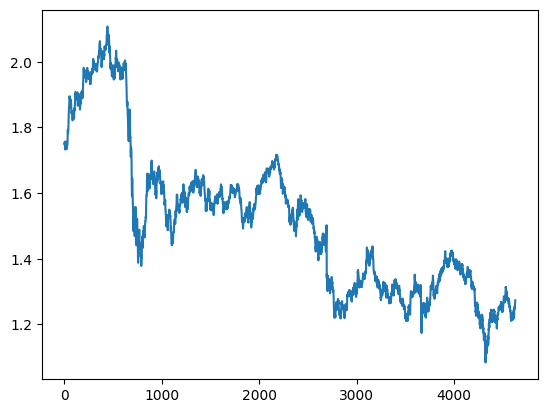

In [ ]:
# Plotting GBPtoUSD Exchange rate
plt.plot(data_set['High'])

In [ ]:
# Data frame
df = data_set['High']

In [ ]:
print(df)

0       1.7500
1       1.7535
2       1.7555
3       1.7555
4       1.7505
         ...  
4626    1.2571
4627    1.2616
4628    1.2645
4629    1.2716
4630    1.2734
Name: High, Length: 4631, dtype: float64


In [ ]:
# Preprocessing data set
df = np.array(df).reshape(-1,1)

In [ ]:
df

array([[1.75  ],
       [1.7535],
       [1.7555],
       ...,
       [1.2645],
       [1.2716],
       [1.2734]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df = scaler.fit_transform(df)

In [ ]:
df

array([[0.65077659],
       [0.65419557],
       [0.65614926],
       ...,
       [0.17651656],
       [0.18345218],
       [0.18521051]])

In [ ]:
# Training and test sets
train = df[:4261]
test = df[4261:]

print(train.shape)
print(test.shape)

(4261, 1)
(370, 1)


In [ ]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [ ]:
look_back = 1

x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(4259, 1)
(4259,)


In [ ]:
x_test , y_test = get_data(test, look_back)
print(x_test.shape)
print(y_test.shape)

(368, 1)
(368,)


In [ ]:
# Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4259, 1, 1)
(368, 1, 1)


In [ ]:
# Defining the LSTM model
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
n_features = x_train.shape[1]
model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (1, 1)))
model.add(Dense(n_features))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
# Training
model.fit(x_train, y_train, epochs = 5, batch_size=1)

Epoch 1/5
4259/4259 [==============================] - 21s 5ms/step - loss: 0.0047
Epoch 2/5
4259/4259 [==============================] - 13s 3ms/step - loss: 1.1426e-04
Epoch 3/5
4259/4259 [==============================] - 13s 3ms/step - loss: 8.8192e-05
Epoch 4/5
4259/4259 [==============================] - 14s 3ms/step - loss: 8.6107e-05
Epoch 5/5
4259/4259 [==============================] - 15s 4ms/step - loss: 8.2381e-05


In [ ]:
# Prediction using the trained model
scaler.scale_

array([0.97684869])

In [ ]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

12/12 [==============================] - 0s 2ms/step
[[1.2200699]
 [1.2195296]
 [1.2179985]
 [1.2143964]
 [1.2023923]
 [1.2060561]
 [1.2082369]
 [1.2066666]
 [1.1960253]
 [1.2004734]]


In [ ]:
# Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[1.2183]
 [1.2166]
 [1.2126]
 [1.1989]
 [1.2031]
 [1.2056]
 [1.2038]
 [1.1916]
 [1.1967]
 [1.1895]]


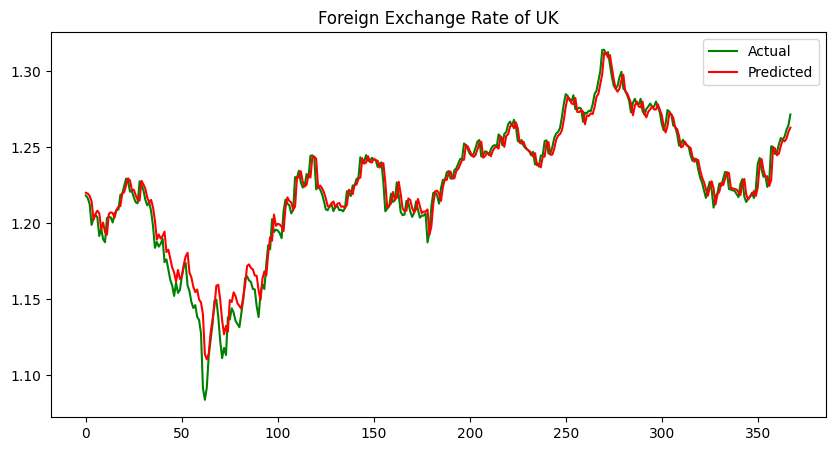

In [ ]:
# Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of UK')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

6.456323069992886e-05

In [ ]:
from keras.layers import Flatten, Dropout

# Building the DNN model
model_dnn = Sequential()
model_dnn.add(Flatten(input_shape=(1, 1)))
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dense(1))

In [ ]:
# Compiling the DNN model
model_dnn.compile(optimizer='adam', loss='mse')

# Training the DNN model
model_dnn.fit(x_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
4259/4259 [==============================] - 12s 3ms/step - loss: 4.6402e-04
Epoch 2/5
4259/4259 [==============================] - 12s 3ms/step - loss: 1.2856e-04
Epoch 3/5
4259/4259 [==============================] - 15s 3ms/step - loss: 1.1504e-04
Epoch 4/5
4259/4259 [==============================] - 8s 2ms/step - loss: 1.0960e-04
Epoch 5/5
4259/4259 [==============================] - 9s 2ms/step - loss: 1.0616e-04


In [ ]:
# Making predictions using the DNN model
y_pred_dnn = model_dnn.predict(x_test)
y_pred_dnn = scaler.inverse_transform(y_pred_dnn)
print(y_pred_dnn[:10])

12/12 [==============================] - 0s 2ms/step
[[1.2218384]
 [1.2212976]
 [1.2197653]
 [1.2166085]
 [1.2074306]
 [1.2101561]
 [1.2118297]
 [1.2106247]
 [1.2030896]
 [1.2061224]]


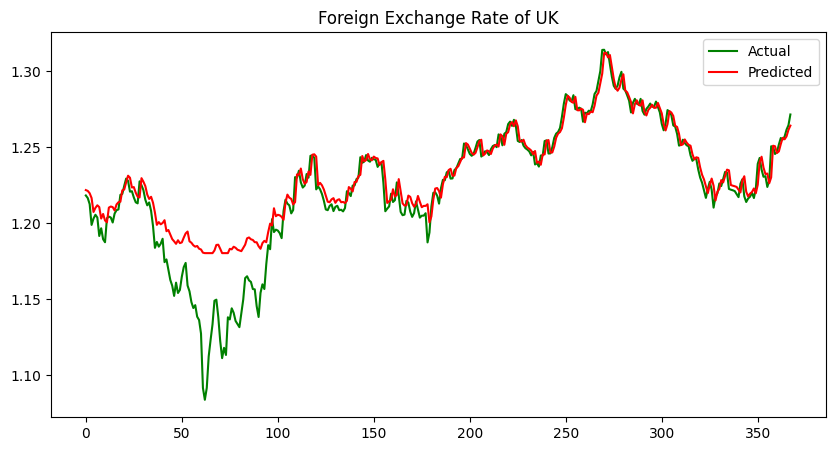

In [ ]:
# Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of UK')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred_dnn , label = 'Predicted', color = 'r')
plt.legend()

In [ ]:
# Calculating metrics for LSTM model
mse_lstm = mean_squared_error(y_test, y_pred)
r2_lstm = r2_score(y_test, y_pred)

print("LSTM Model:")
print(f"MSE: {mse_lstm}")
print(f"R-squared: {r2_lstm}")

# Calculating metrics for DNN model
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

print("\nDNN Model:")
print(f"MSE: {mse_dnn}")
print(f"R-squared: {r2_dnn}")

LSTM Model:
MSE: 6.456323069992886e-05
R-squared: 0.964978531199783

DNN Model:
MSE: 0.0003355017564509064
R-squared: 0.8180115188074631


Doing a comparison of LTSM to DNN, it is clear that LTSM has a better predictive model. DNN has a difficult time predicting the extreme changes in the dataset; whereas, LTSM is able to make those predictions with substantially higher accuracy